In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
loan_df = pd.read_csv('Loan.csv')

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [5]:
loan_df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [6]:
loan_df=loan_df.drop("ApplicationDate",axis=1)

LoanApproved
0    15220
1     4780
Name: count, dtype: int64


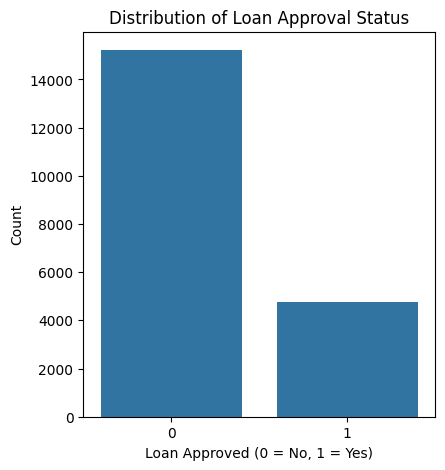

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=loan_df, x='LoanApproved')
plt.title("Distribution of Loan Approval Status")
plt.xlabel("Loan Approved (0 = No, 1 = Yes)")
plt.ylabel("Count")
print(loan_df['LoanApproved'].value_counts())

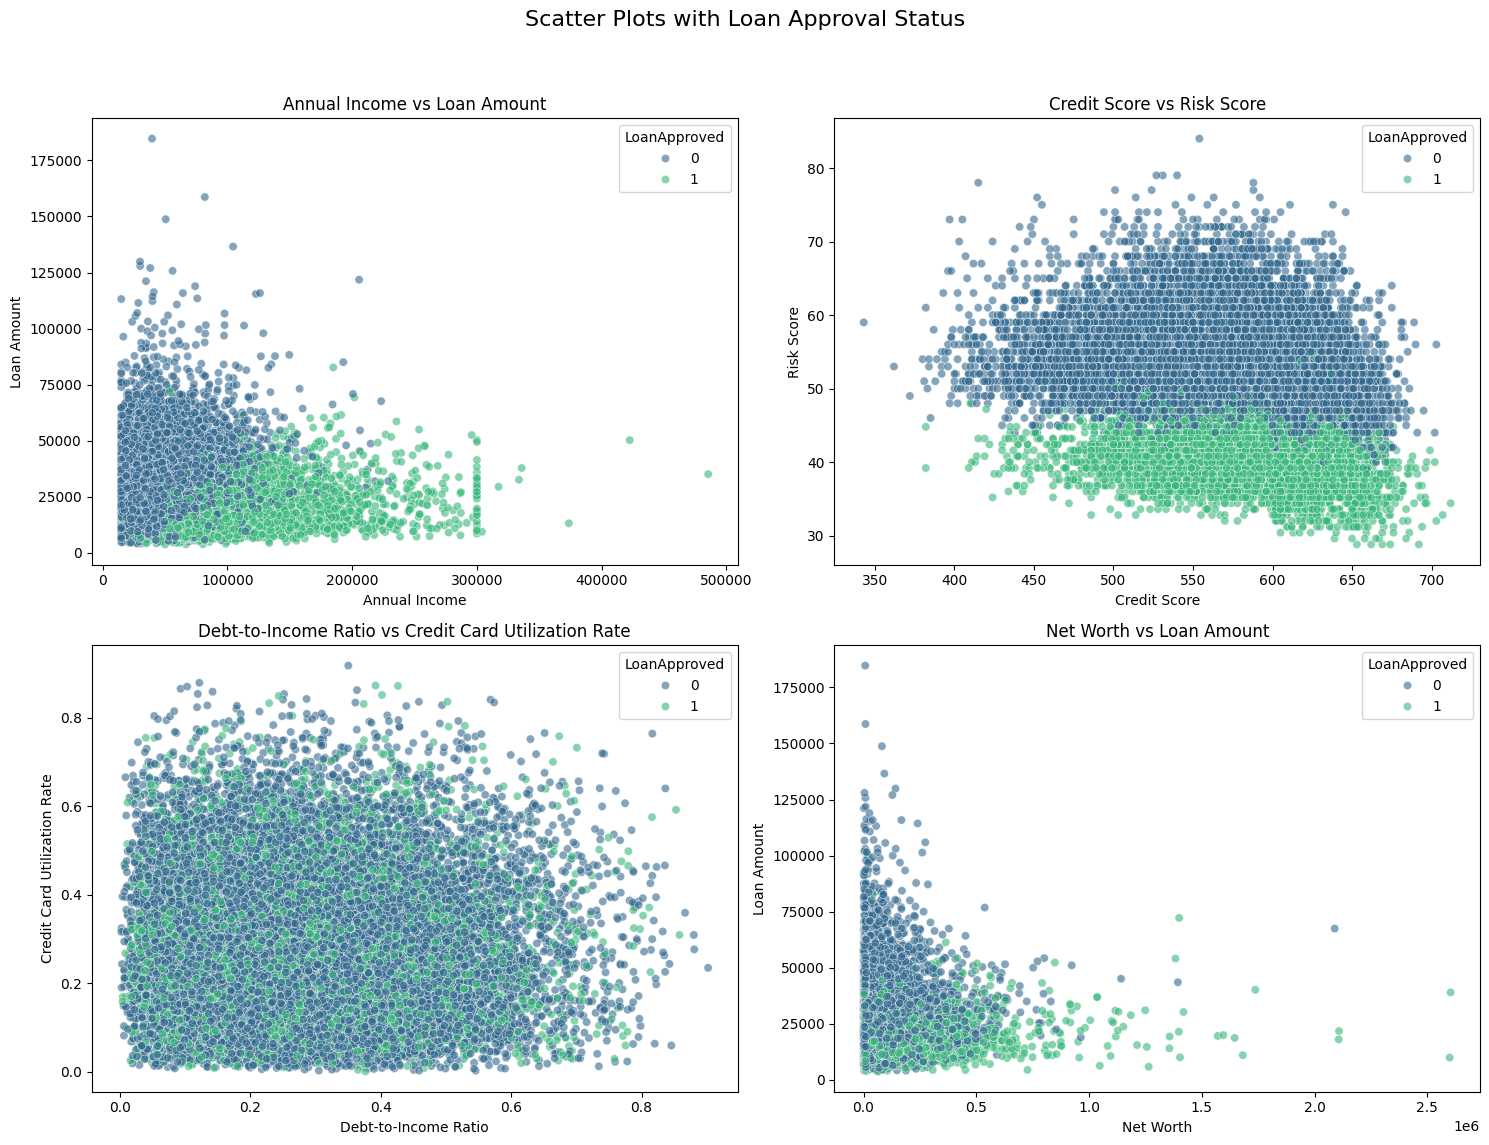

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Scatter Plots with Loan Approval Status', fontsize=16)

sns.scatterplot(data=loan_df, x='AnnualIncome', y='LoanAmount', hue='LoanApproved', palette='viridis', alpha=0.6, ax=axes[0, 0])
axes[0, 0].set_title('Annual Income vs Loan Amount')
axes[0, 0].set_xlabel('Annual Income')
axes[0, 0].set_ylabel('Loan Amount')

sns.scatterplot(data=loan_df, x='CreditScore', y='RiskScore', hue='LoanApproved', palette='viridis', alpha=0.6, ax=axes[0, 1])
axes[0, 1].set_title('Credit Score vs Risk Score')
axes[0, 1].set_xlabel('Credit Score')
axes[0, 1].set_ylabel('Risk Score')

sns.scatterplot(data=loan_df, x='DebtToIncomeRatio', y='CreditCardUtilizationRate', hue='LoanApproved', palette='viridis', alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Debt-to-Income Ratio vs Credit Card Utilization Rate')
axes[1, 0].set_xlabel('Debt-to-Income Ratio')
axes[1, 0].set_ylabel('Credit Card Utilization Rate')

sns.scatterplot(data=loan_df, x='NetWorth', y='LoanAmount', hue='LoanApproved', palette='viridis', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Net Worth vs Loan Amount')
axes[1, 1].set_xlabel('Net Worth')
axes[1, 1].set_ylabel('Loan Amount')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


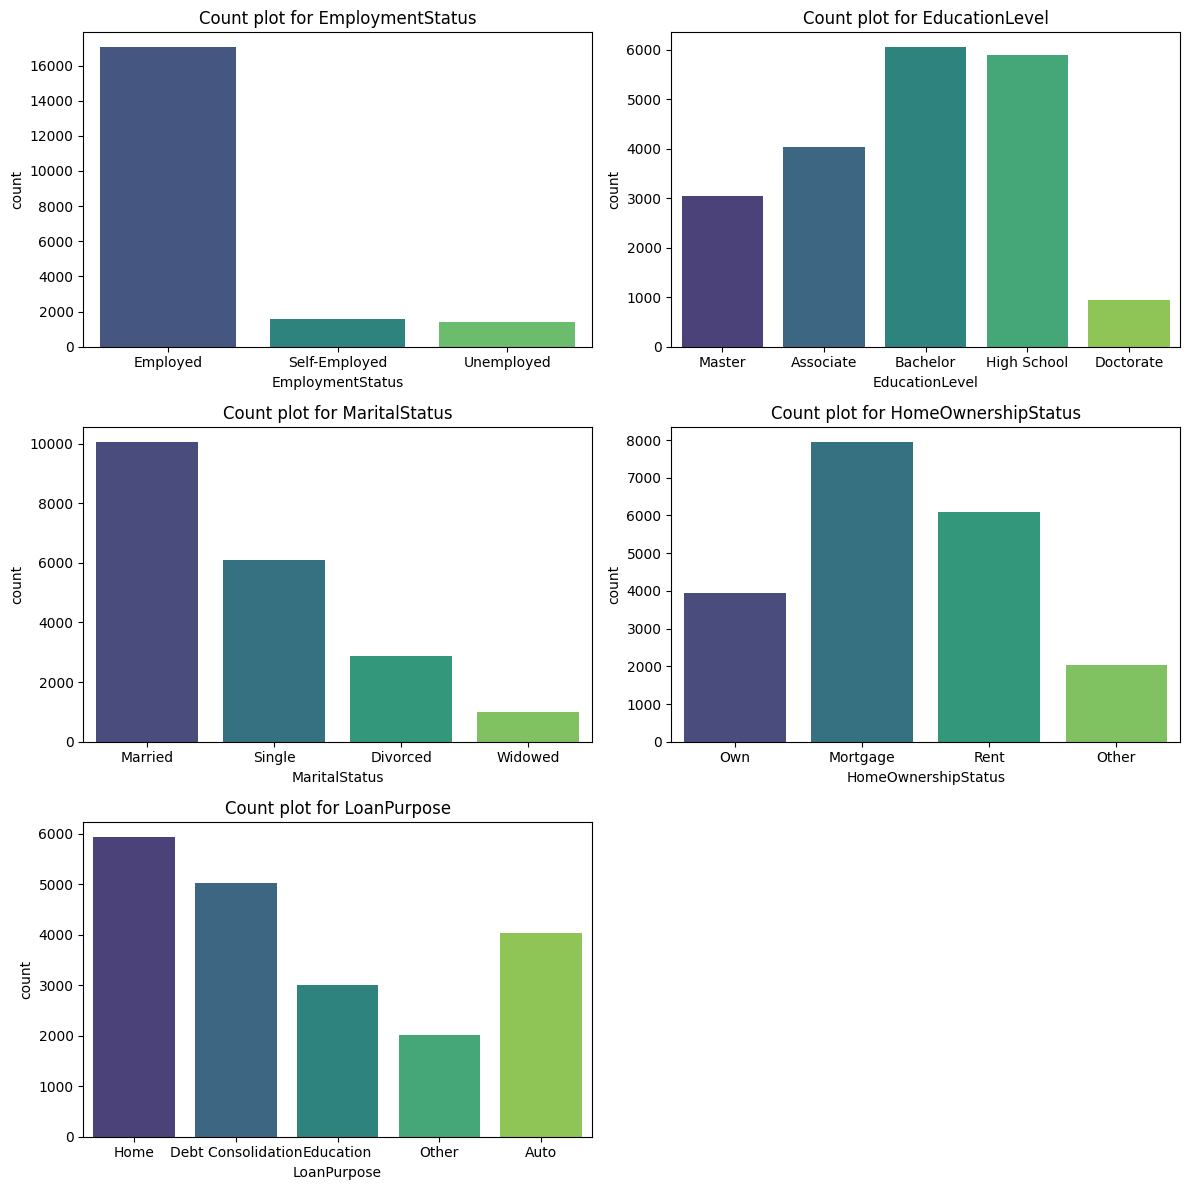

In [9]:
categorical_columns = loan_df.select_dtypes('object').columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(data=loan_df, x=col, ax=axes[i], hue=col, palette="viridis", legend=False)
    axes[i].set_title(f"Count plot for {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [20]:
X = loan_df.drop('LoanApproved', axis=1)
y = loan_df['LoanApproved']

In [11]:
X.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,36.0


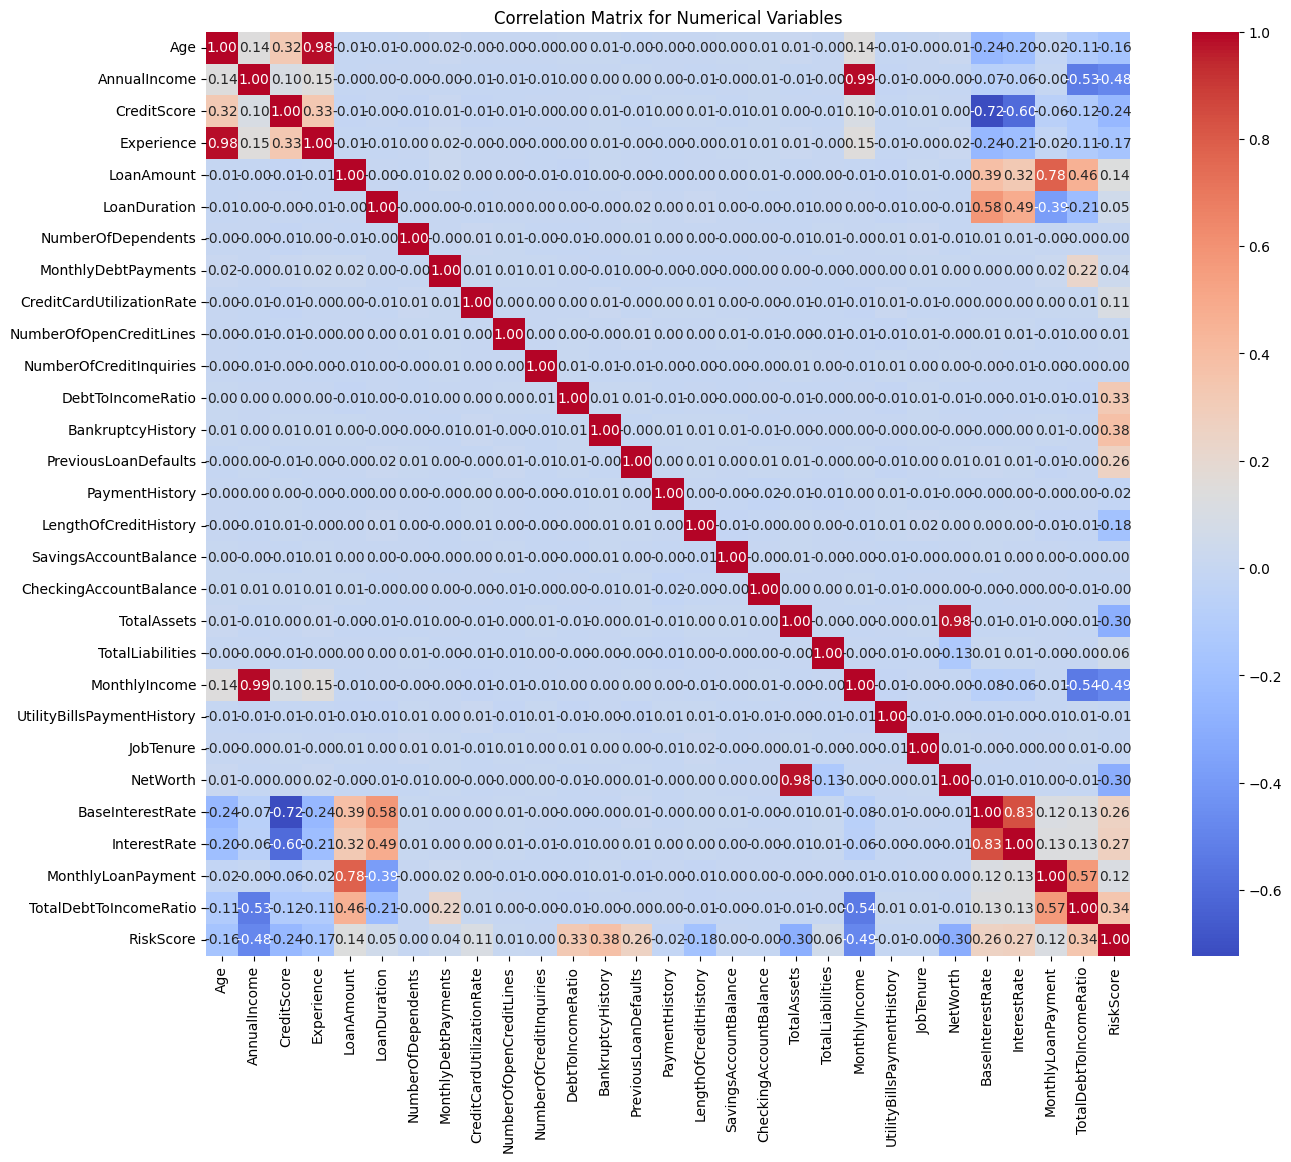

In [12]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = X[numerical_columns].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

In [13]:
correlation_matrix = X[numerical_columns].corr().abs()
threshold = 0.9
high_correlation_pairs = [
    (col1, col2, correlation_matrix.loc[col1, col2])
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and correlation_matrix.loc[col1, col2] > threshold
]
high_correlation_pairs = list(set(tuple(sorted(pair[:2])) + (pair[2],) for pair in high_correlation_pairs))
for col1, col2, corr_value in high_correlation_pairs:
    print(f"Correlation between {col1} and {col2}: {corr_value:.2f}")


Correlation between NetWorth and TotalAssets: 0.98
Correlation between AnnualIncome and MonthlyIncome: 0.99
Correlation between Age and Experience: 0.98


In [14]:
X['NetWorth_TotalAssets'] = X['NetWorth'] * X['TotalAssets']
X['Age_Experience'] = X['Age'] * X['Experience']
X['AnnualIncome_MonthlyIncome'] = X['AnnualIncome'] * X['MonthlyIncome']

X = X.drop(['NetWorth', 'TotalAssets', 'Age', 'Experience', 'AnnualIncome', 'MonthlyIncome'], axis=1)

In [21]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
ordinal_preprocessor = OrdinalEncoder(categories=[education_order])

X_dev, X_test, y_dev, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


X_train, X_val, y_train, y_val = train_test_split(
    X_dev, y_dev, test_size=0.2, stratify=y_dev, random_state=42
)

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(exclude=['float64', 'int64']).columns

categorical_columns.drop('EducationLevel')
ordinal_columns = ['EducationLevel']

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("ordinal-encoder", ordinal_preprocessor, ordinal_columns),
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

one_hot_columns = preprocessor.named_transformers_["one-hot-encoder"].get_feature_names_out(categorical_columns)

ordinal_columns = ordinal_columns  # OrdinalEncoder retains the original column names

numerical_columns = numerical_columns  # StandardScaler retains the original column names

all_columns = list(one_hot_columns) + list(numerical_columns) + list(ordinal_columns)

X_train_df = pd.DataFrame(X_train, columns=all_columns)
X_val_df = pd.DataFrame(X_val, columns=all_columns)
X_test_df = pd.DataFrame(X_test, columns=all_columns)

print(X_train.shape)

(12800, 51)


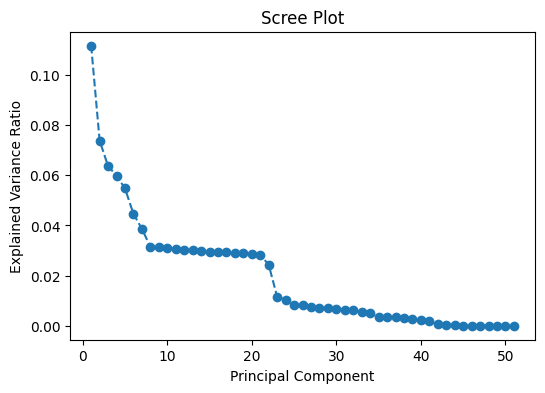

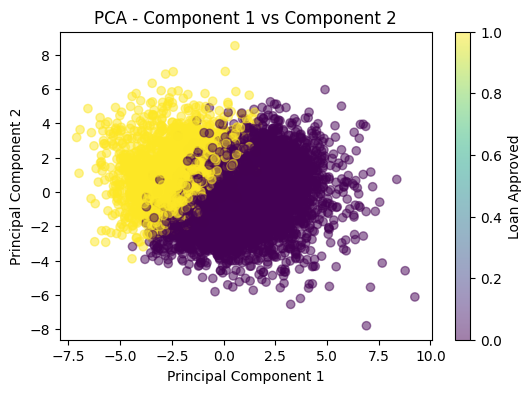

In [22]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Scree plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot PCA components 1 vs 2
plt.figure(figsize=(6,4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA - Component 1 vs Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Loan Approved')
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select the first 8 PCA components
X_train_pca_8 = X_train_pca[:, :8]
X_val_pca_8 = pca.transform(X_val)[:, :8]

# Create and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_pca_8, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val_pca_8)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

Confusion Matrix:
[[2364   71]
 [  67  698]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2435
           1       0.91      0.91      0.91       765

    accuracy                           0.96      3200
   macro avg       0.94      0.94      0.94      3200
weighted avg       0.96      0.96      0.96      3200



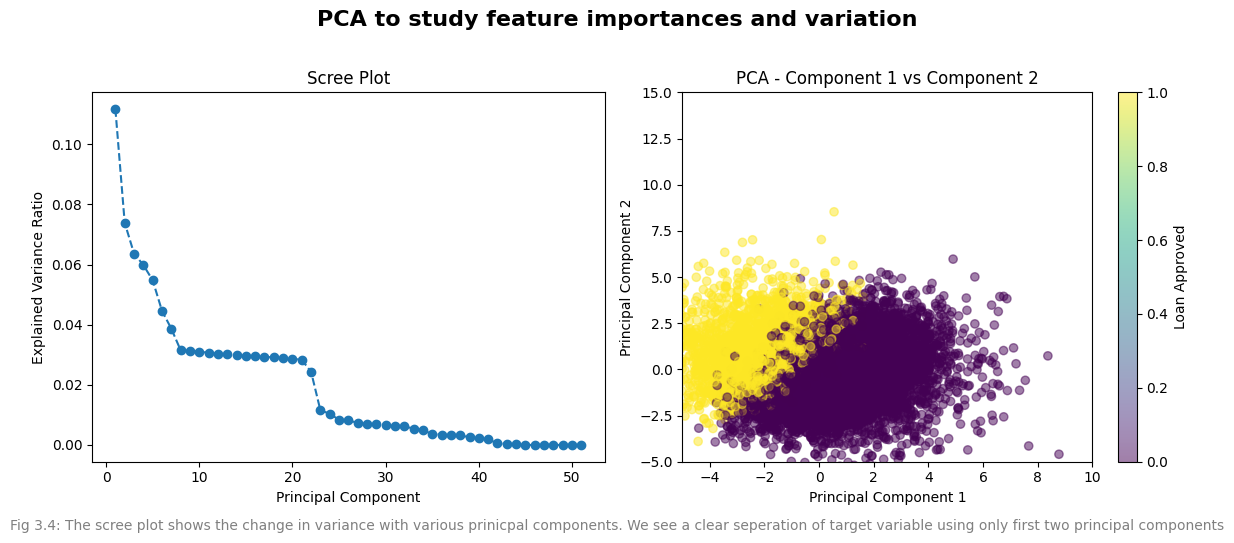

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Create a 1x2 grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scree plot
ax1.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
ax1.set_title('Scree Plot')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')

# PCA - Component 1 vs Component 2
scatter = ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
ax2.set_title('PCA - Component 1 vs Component 2')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_xlim([-5, 10])
ax2.set_ylim([-5, 15])
fig.colorbar(scatter, ax=ax2, label='Loan Approved')


plt.suptitle("PCA to study feature importances and variation", fontsize=16, fontweight="bold", y=1.02)
fig.text(0.5, -0.02, 'Fig 3.4: The scree plot shows the change in variance with various prinicpal components. We see a clear seperation of target variable using only first two principal components', ha='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()